In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_filename='flights.csv'
airlines_filename='book.csv'
df=pd.read_csv(data_filename)
dfairnames=pd.read_csv(airlines_filename, delimiter=";")

#first question

df3=df.groupby('ORIGIN').count()['FL_DATE'] #how many flights has each airport

df4=df3.loc[df3<=df3.quantile(0.01)] #finding the 1% airports with the least flights 


df1=df.loc[(df['DEP_DELAY']>0)] #dataframe with the flights that has positive dep_delay




df2=df1.groupby('ORIGIN').count()['DEP_DELAY']/df.groupby('ORIGIN').count()['DEP_DELAY']
dfoutliers=df2.drop(labels=df4.index)  #probability of each airport to delay without outliers
grouped=df1.groupby('ORIGIN')
dfmean=grouped.mean()['DEP_DELAY'].drop(labels=df4.index) #mean of each airport to delay without outliers
dfmedian=grouped.median()['DEP_DELAY'].drop(labels=df4.index) #median of each airport to delay without outliers

#combining the probability,mean and median
series=pd.Series(dfoutliers.index)
dffirst=pd.concat([series.reset_index(drop=True),dfoutliers.reset_index(drop=True),dfmean.reset_index(drop=True),dfmedian.reset_index(drop=True)], axis=1)
dffirst.columns=['ORIGIN','PROBABILITY','MEAN','MEDIAN'] #rename the columns
dffirst=dffirst.sort_values(by=['PROBABILITY'])

dffirst


,ORIGIN,PROBABILITY,MEAN,MEDIAN
99,EAR,0.085427,51.882353,13.0
188,LBF,0.088968,60.140000,21.0
202,LWS,0.090782,53.815385,29.0
78,CPR,0.110998,68.073394,20.0
103,EKO,0.118196,51.039474,9.0
147,HIB,0.126623,68.641026,19.5
298,SCC,0.128927,40.487395,21.0
29,BFF,0.133333,66.881579,27.0
148,HLN,0.136137,48.186992,14.0
50,BTM,0.142012,55.802083,13.5


In [2]:
#second question
dsecond=pd.DataFrame({'CARRIER','DEP_DELAY'})
dfair=df1.groupby('CARRIER').count()['FL_DATE']/df.groupby('CARRIER').count()['DEP_DELAY'] #probability of each airline code to delay with outliers
dfairmean=df1.groupby('CARRIER').mean()['DEP_DELAY']#mean series for each CARRIER
dfairmedian=df1.groupby('CARRIER').median()['DEP_DELAY'] #median series for each CARRIER



#combining the series to make a dataframe for probability
series=pd.Series(dfair.index) 
dsecond = pd.concat([series.reset_index(drop=True),dfair.reset_index(drop=True)], axis=1)
dsecond1=pd.merge(dsecond,dfairnames, on=['CARRIER'], how='inner') #taking the name of the airlines

#combining the series to make a dataframe for mean
seriesmean=pd.Series(dfairmean.index)
dsecondmean = pd.concat([seriesmean.reset_index(drop=True),dfairmean.reset_index(drop=True)], axis=1)
dsecondmean1=pd.merge(dsecondmean,dfairnames, on=['CARRIER'], how='inner')

#combining the series to make a dataframe for median
seriesmedian=pd.Series(dfairmedian.index)
dsecondmedian = pd.concat([seriesmedian.reset_index(drop=True),dfairmedian.reset_index(drop=True)], axis=1)
dsecondmedian1=pd.merge(dsecondmedian,dfairnames, on=['CARRIER'], how='inner')
dsecondmedian1

#creating new dataframe with probability, mean and median
dsecond123 = pd.concat([series.reset_index(drop=True),dfair.reset_index(drop=True),dfairmean.reset_index(drop=True),dfairmedian.reset_index(drop=True)], axis=1)
dsecond1234=pd.merge(dsecond123,dfairnames, on=['CARRIER'], how='inner')
dsecond1234.columns=['CARRIER', 'PROBABILITY', 'MEAN', 'MEDIAN', 'DESCRIPTION']#rename the columns of the dataframe
dsecond1234=dsecond1234.sort_values(by=['PROBABILITY'])
dsecond1234

,CARRIER,PROBABILITY,MEAN,MEDIAN,DESCRIPTION
17,YX,0.247550,46.784504,25.0,Republic Airline
8,HA,0.260726,19.220196,7.0,Hawaiian Airlines Inc.
12,OO,0.265934,54.693784,24.0,SkyWest Airlines Inc.
2,AS,0.271901,28.812374,14.0,Alaska Airlines Inc.
5,EV,0.273145,61.865041,31.0,ExpressJet Airlines LLC
0,9E,0.276277,53.945690,25.0,Endeavor Air Inc.
16,YV,0.287342,51.562570,23.0,Mesa Airlines Inc.
9,MQ,0.292105,39.543712,20.0,Envoy Air
10,NK,0.292929,46.655881,19.0,Spirit Air Lines
13,UA,0.300299,45.336768,20.0,United Air Lines Inc.


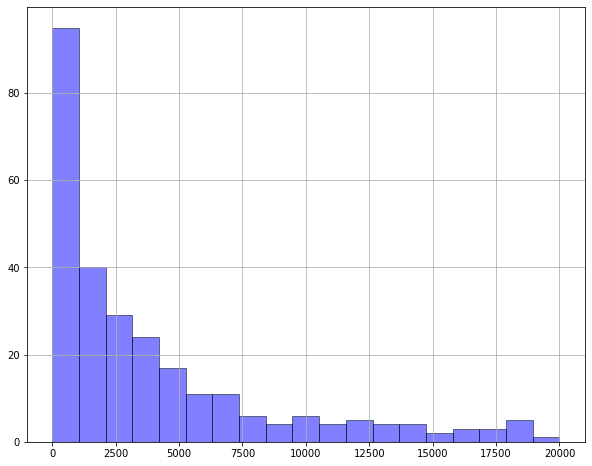

In [9]:
#third question

dhist=df.groupby('ORIGIN').count()['FL_DATE'].value_counts() #counting the flights
series=pd.Series(dhist.index,name='numofflights') #taking the index from dhist series
dhist1 = pd.concat([series.reset_index(drop=True),dhist.reset_index(drop=True)], axis=1) #creating the dataframe


dhist1.numofflights.hist(bins=np.linspace(0, 20000, 20),color='blue', edgecolor='black', 
                        alpha=0.5, figsize=(10, 8))

C:\Users\Stavros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


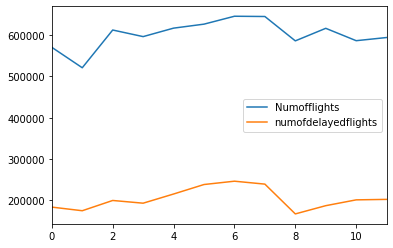

In [12]:
#fourth question
df['month']=pd.DatetimeIndex(df['FL_DATE']).month
dfnumf=df.groupby('month').count()['FL_DATE'] #counting all the flights
df1['month']=pd.DatetimeIndex(df1['FL_DATE']).month

dfnumdf=df1.groupby('month').count()['FL_DATE'] #counting the flights with delay

dplot = pd.concat([dfnumf.reset_index(drop=True),dfnumdf.reset_index(drop=True)], axis=1) #combining the two series

dplot.columns=['Numofflights','numofdelayedflights']
dplot.plot()

In [13]:
#fifth question

dffifth1=df['ORIGIN']
dffifth1
dfifth2=df['DEST']
dfifth3=df['CARRIER']
dfifth4=df['DEP_DELAY']
dfifth= pd.concat([dffifth1.reset_index(drop=True),dfifth2.reset_index(drop=True),dfifth3.reset_index(drop=True),dfifth4.reset_index(drop=True)], axis=1)#creating the new DataFrame

dfifth['ORDES']=dfifth['ORIGIN'] + ' ' + dfifth['DEST'] #combining the columns ORIGIN and DEST so that we can drop the duplicates
dfifth=dfifth.sort_values(by=['DEP_DELAY']) #sorting by DEP_DELAY and then dropping duplicates from the new column ORDES
dfif=dfifth.drop_duplicates(subset='ORDES',keep='first')


dfif1=pd.merge(dfif,dfairnames, on=['CARRIER'], how='inner') #taking the name of the airlines. I have change the column name of airlines from 'Code' to 'CARRIER'
dfif1.sort_values(by=['DEP_DELAY'])

def find_best_airline(ordes): #creating the function that takes ORIGIN and DESTINATION in the same string with one space and returns the best airline in terms of DEP_DELAY
    dfindbest=dfif1.loc[(dfif1['ORDES']==ordes)] 
    return dfindbest


,ORIGIN,DEST,CARRIER,DEP_DELAY,ORDES,Description
0,SPN,GUM,UA,-122.0,SPN GUM,United Air Lines Inc.
1,GUM,SPN,UA,-120.0,GUM SPN,United Air Lines Inc.
367,OME,ANC,AS,-114.0,OME ANC,Alaska Airlines Inc.
2,SNA,IAH,UA,-72.0,SNA IAH,United Air Lines Inc.
672,STL,LAS,F9,-60.0,STL LAS,Frontier Airlines Inc.
368,ADK,ANC,AS,-60.0,ADK ANC,Alaska Airlines Inc.
1201,SLC,SEA,OO,-60.0,SLC SEA,SkyWest Airlines Inc.
1200,CAK,ORD,OO,-60.0,CAK ORD,SkyWest Airlines Inc.
1202,MOB,ATL,OO,-57.0,MOB ATL,SkyWest Airlines Inc.
1203,FAT,SAN,OO,-57.0,FAT SAN,SkyWest Airlines Inc.
